In [1]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.2 MB/s eta 0:00:00


In [17]:
# huggingface datatsets
from datasets import load_dataset

Trying out with MRDA: fewer labels than OASIS

In [18]:
silicone_data_train = load_dataset('silicone', 'oasis', split = 'train').to_pandas()
silicone_data_test = load_dataset('silicone', 'oasis', split = 'test').to_pandas()

In [19]:
silicone_data_valid = load_dataset('silicone', 'oasis', split = 'validation').to_pandas()

In [20]:


# The one hot encoding of each 42 labels
from sklearn.preprocessing import LabelBinarizer
ohencoder=LabelBinarizer()
# Training data
trainlabels=silicone_data_train.copy()
trainlabels=trainlabels.pop('Dialogue_Act')
trainlabels=trainlabels.values

validlabels=silicone_data_valid.copy()
validlabels=validlabels.pop('Dialogue_Act')
validlabels=validlabels.values
#Train data
trainlabels=ohencoder.fit_transform(trainlabels)

# Test data
testlabels=ohencoder.transform(silicone_data_test['Dialogue_Act'].values)

# Validation data
validationlabels=ohencoder.transform(validlabels)



In [21]:
import tensorflow as tf

In [22]:
!pip install tensorflow_text

  Using cached https://files.pythonhosted.org/packages/87/0b/ad910019800202812d226524244472d9475a4dd531e5f9b1cb3e11ef685e/tensorflow_text-2.1.1-cp27-cp27m-macosx_10_15_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a7/a9/d44e012a2491cf4845b5cac79c3c3af5ab95d657c8953e9d6e076bb05f4d/tensorflow-2.1.0-cp27-cp27m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f6/d6/44792ec668bcda7d91913c75237314e688f70415ab2acd7172c845f0b24f/opt_einsum-2.3.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/88/ec/f598b633c3d5ffe267aaada57d961c94fdfa183c5c3ebda2b6d151943db6/backports.weakref-1.0.post1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bd/81/6c704c002a992b9d6466c739e3e7687e0bb2365d8cd63d7fc8e95d502cb6/grpcio-1.41.1.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/private/var/folders/8m/snm9lyg512

In [23]:
!pip install tensorflow_hub

    100% |████████████████████████████████| 102kB 3.7MB/s a 0:00:011
    100% |████████████████████████████████| 174kB 4.6MB/s ta 0:00:01
protobuf requires Python '>=3.7' but the running Python is 2.7.16
You are using pip version 18.1, however version 20.3.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
import tensorflow as tf
#Small BERT Model with less layers than the original BERT
import tensorflow_text
import tensorflow_hub as hub

Ideas:
- Test BERT Uncased 512, 256, 768 and compare training time and accuracy: https://github.com/google-research/bert/blob/master/README.md

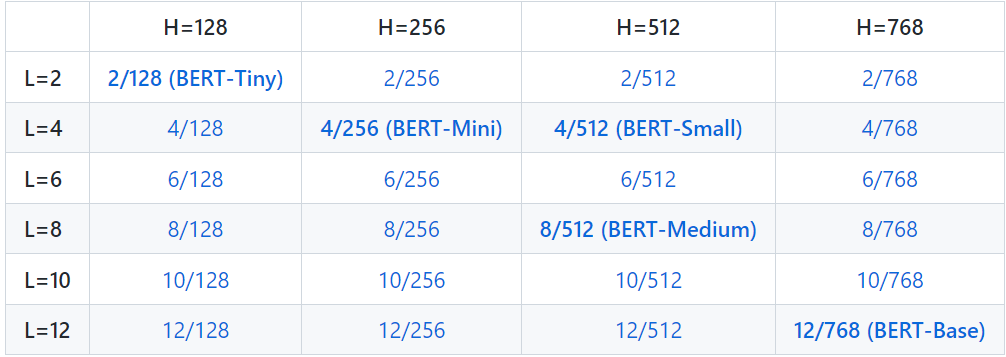


In [35]:
def modelname(bert_model_name):
#bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' # BERT SMALL 
#bert_model_name = 'small_bert/bert_en_uncased_L-4_H-256_A-4' #BERT MINI
#bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8' # BERT MEDIUM
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12' # BERT BASE


    map_name_to_handle = {
        'bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
        'bert_en_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
        'bert_multi_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
        'small_bert/bert_en_uncased_L-2_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-2_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-2_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-2_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-4_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-4_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-4_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-4_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-6_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-6_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-6_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-6_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-8_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-8_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-8_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-8_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-10_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-10_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-10_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-10_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
        'small_bert/bert_en_uncased_L-12_H-128_A-2':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
        'small_bert/bert_en_uncased_L-12_H-256_A-4':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
        'small_bert/bert_en_uncased_L-12_H-512_A-8':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
        'small_bert/bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
        'albert_en_base':
            'https://tfhub.dev/tensorflow/albert_en_base/2',
        'electra_small':
            'https://tfhub.dev/google/electra_small/2',
        'electra_base':
            'https://tfhub.dev/google/electra_base/2',
        'experts_pubmed':
            'https://tfhub.dev/google/experts/bert/pubmed/2',
        'experts_wiki_books':
            'https://tfhub.dev/google/experts/bert/wiki_books/2',
        'talking-heads_base':
            'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
    }

    map_model_to_preprocess = {
        'bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'bert_en_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-2_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-4_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-6_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-8_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-10_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-128_A-2':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-256_A-4':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-512_A-8':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'small_bert/bert_en_uncased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'bert_multi_cased_L-12_H-768_A-12':
            'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
        'albert_en_base':
            'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
        'electra_small':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'electra_base':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'experts_pubmed':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'experts_wiki_books':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
        'talking-heads_base':
            'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    }

    tfhub_handle_encoder = map_name_to_handle[bert_model_name]
    tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

    print(f'BERT model selected           : {tfhub_handle_encoder}')
    print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

In [ ]:
#BERT Model
modelname("small_bert/bert_en_uncased_L-4_H-512_A-8-")

In [27]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
trainfeatures= silicone_data_train.copy()
trainfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)

trainfeatures=trainfeatures.values
#trainlabels=silicone_data_train.copy()
#trainlabels=trainlabels.pop('Dialogue_Act')
#trainlabels=trainlabels.values

#validlabels=silicone_data_valid.copy()
#validlabels=validlabels.pop('Dialogue_Act')
#validlabels=validlabels.values
validfeatures= silicone_data_valid.copy()
validfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)
validfeatures=validfeatures.values

testfeatures= silicone_data_test.copy()
testfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)

testfeatures=testfeatures.values
#On one example : preprocessing of the text
text_preprocessed = bert_preprocess_model(trainfeatures[0])

In [28]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.96773195  0.675988    0.28997964 -0.02876327  0.8563128   0.986209
  0.9957469  -0.99112827 -0.4885531  -0.9999658   0.40668285 -0.99823403]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.17933664 -0.3402118   0.57689905 ... -0.9672891   1.0642695
   0.25493765]
 [-0.12189357 -0.5321298   0.18562663 ... -0.30619168  0.30260938
  -0.26425076]
 [ 0.5945619   0.11958494 -0.5828177  ... -0.5487797   0.39618868
   0.2910367 ]
 ...
 [ 0.39675522  0.01968395 -0.12897992 ... -0.20042554  0.6511649
   0.1640411 ]
 [ 0.41165984 -0.24797739  0.25611258 ... -0.35042858  0.8410864
  -0.05028187]
 [ 0.28270364  0.04331642  0.3261378  ... -0.42353386  0.8647728
  -0.14533097]]


In [29]:
#Definition of the model
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(42, activation=None, name='classifier')(net) # for OASIS
  #net = tf.keras.layers.Dense(5, activation=None, name='classifier')(net) # for MRDA
  return tf.keras.Model(text_input, net)



In [30]:


classifier_model = build_classifier_model()
classifier_model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [31]:


loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()



In [32]:


epochs=5
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)



In [33]:
#BERT SMALL

In [34]:
%%timeit
# Model Training  
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
378/378 [==============================] - 1069s 3s/step - loss: 2.1254 - categorical_accuracy: 0.4712 - val_loss: 1.4588 - val_categorical_accuracy: 0.5995
Epoch 2/5
378/378 [==============================] - 1112s 3s/step - loss: 1.3899 - categorical_accuracy: 0.6173 - val_loss: 1.2005 - val_categorical_accuracy: 0.6583
Epoch 3/5
378/378 [==============================] - 1168s 3s/step - loss: 1.2011 - categorical_accuracy: 0.6538 - val_loss: 1.1161 - val_categorical_accuracy: 0.6675
Epoch 4/5
378/378 [==============================] - 1181s 3s/step - loss: 1.1071 - categorical_accuracy: 0.6731 - val_loss: 1.0798 - val_categorical_accuracy: 0.6761
Epoch 5/5
378/378 [==============================] - 1190s 3s/step - loss: 1.0329 - categorical_accuracy: 0.6896 - val_loss: 1.0868 - val_categorical_accuracy: 0.6675
Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncas

KeyboardInterrupt: 

In [41]:
#Medium BERT
modelname('small_bert/bert_en_uncased_L-8_H-512_A-8')
classifier_model = build_classifier_model()
classifier_model.summary()
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)


BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                    

In [42]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
trainfeatures= silicone_data_train.copy()
trainfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)

trainfeatures=trainfeatures.values
#trainlabels=silicone_data_train.copy()
#trainlabels=trainlabels.pop('Dialogue_Act')
#trainlabels=trainlabels.values

#validlabels=silicone_data_valid.copy()
#validlabels=validlabels.pop('Dialogue_Act')
#validlabels=validlabels.values
validfeatures= silicone_data_valid.copy()
validfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)
validfeatures=validfeatures.values

testfeatures= silicone_data_test.copy()
testfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)

testfeatures=testfeatures.values
#On one example : preprocessing of the text
text_preprocessed = bert_preprocess_model(trainfeatures[0])

In [43]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.96773195  0.675988    0.28997964 -0.02876327  0.8563128   0.986209
  0.9957469  -0.99112827 -0.4885531  -0.9999658   0.40668285 -0.99823403]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.17933664 -0.3402118   0.57689905 ... -0.9672891   1.0642695
   0.25493765]
 [-0.12189357 -0.5321298   0.18562663 ... -0.30619168  0.30260938
  -0.26425076]
 [ 0.5945619   0.11958494 -0.5828177  ... -0.5487797   0.39618868
   0.2910367 ]
 ...
 [ 0.39675522  0.01968395 -0.12897992 ... -0.20042554  0.6511649
   0.1640411 ]
 [ 0.41165984 -0.24797739  0.25611258 ... -0.35042858  0.8410864
  -0.05028187]
 [ 0.28270364  0.04331642  0.3261378  ... -0.42353386  0.8647728
  -0.14533097]]


In [44]:
%%timeit
# Model Training  Medium BERT
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)




Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
378/378 [==============================] - 39824s 106s/step - loss: 2.0585 - categorical_accuracy: 0.5102 - val_loss: 1.4739 - val_categorical_accuracy: 0.6061
Epoch 2/5
378/378 [==============================] - 1063s 3s/step - loss: 1.3865 - categorical_accuracy: 0.6217 - val_loss: 1.2319 - val_categorical_accuracy: 0.6418
Epoch 3/5
378/378 [==============================] - 1063s 3s/step - loss: 1.1943 - categorical_accuracy: 0.6585 - val_loss: 1.1340 - val_categorical_accuracy: 0.6590
Epoch 4/5
378/378 [==============================] - 1128s 3s/step - loss: 1.0932 - categorical_accuracy: 0.6789 - val_loss: 1.0862 - val_categorical_accuracy: 0.6689
Epoch 5/5
378/378 [==============================] - 1190s 3s/step - loss: 1.0285 - categorical_accuracy: 0.6885 - val_loss: 1.0528 - val_categorical_accuracy: 0.6768
Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_un

KeyboardInterrupt: 

In [49]:
#Mini BERT
modelname('small_bert/bert_en_uncased_L-4_H-256_A-4')
classifier_model = build_classifier_model()
classifier_model.summary()
epochs=5
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)


BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                    

In [50]:
%%timeit
# Model Training  mini BERT
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)




Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
378/378 [==============================] - 1232s 3s/step - loss: 2.0645 - categorical_accuracy: 0.5400 - val_loss: 1.4155 - val_categorical_accuracy: 0.6094
Epoch 2/5
378/378 [==============================] - 1303s 3s/step - loss: 1.3664 - categorical_accuracy: 0.6209 - val_loss: 1.2041 - val_categorical_accuracy: 0.6570
Epoch 3/5
378/378 [==============================] - 1271s 3s/step - loss: 1.1930 - categorical_accuracy: 0.6551 - val_loss: 1.1222 - val_categorical_accuracy: 0.6669
Epoch 4/5
378/378 [==============================] - 1295s 3s/step - loss: 1.0953 - categorical_accuracy: 0.6794 - val_loss: 1.0867 - val_categorical_accuracy: 0.6768
Epoch 5/5
378/378 [==============================] - 1468s 4s/step - loss: 1.0402 - categorical_accuracy: 0.6889 - val_loss: 1.0658 - val_categorical_accuracy: 0.6861
Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncas

KeyboardInterrupt: 

In [51]:
#BERT Base
modelname('bert_en_uncased_L-12_H-768_A-12')
classifier_model = build_classifier_model()
classifier_model.summary()
epochs=5
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)


BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
      

In [52]:
%%timeit 
# Model Training  BERT Base
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)




Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
378/378 [==============================] - 1439s 4s/step - loss: 2.1407 - categorical_accuracy: 0.4762 - val_loss: 1.4575 - val_categorical_accuracy: 0.6180
Epoch 2/5
378/378 [==============================] - 1360s 4s/step - loss: 1.3943 - categorical_accuracy: 0.6210 - val_loss: 1.2150 - val_categorical_accuracy: 0.6543
Epoch 3/5
378/378 [==============================] - 3025s 8s/step - loss: 1.2005 - categorical_accuracy: 0.6585 - val_loss: 1.1168 - val_categorical_accuracy: 0.6689
Epoch 4/5
378/378 [==============================] - 1053s 3s/step - loss: 1.0982 - categorical_accuracy: 0.6776 - val_loss: 1.0895 - val_categorical_accuracy: 0.6768
Epoch 5/5
378/378 [==============================] - 1105s 3s/step - loss: 1.0321 - categorical_accuracy: 0.6906 - val_loss: 1.0791 - val_categorical_accuracy: 0.6808
Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncas

KeyboardInterrupt: 